# Setup

In [44]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt #To show color based segmentation and plot some histogram as well

# These libraries provide the functionalities you need for the plot.
from mpl_toolkits.mplot3d import Axes3D #To plot the 3D
#from matplotlib import cm #This one is actually not needed
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# RGB_HexCode to HSV
1. Color Source
- `http://www.workwithcolor.com/green-color-hue-range-01.htm`
2. Link Given in Tutorial 6
- `https://codebeautify.org/hex-to-hsv-converter`

In [42]:
#HSV before convert
#Red Color
low_red = (0, 0.2049, 0.9569) #HexCode: #F4C2C2
high_red = (0, 1, 0.8) #HexCode: #CC0000

#Blue Color
low_blue = (0.6667, 0.2, 1) #HexCode: #CCCCFF
high_blue = (0.6667, 1, 0.6118) #HexCode: #00009C

#Yellow Color
low_yellow = (0.1667, 0.4071, 0.9922) #HexCode: #FDFD96
high_yellow = (0.1638, 1, 0.9020) #HexCode: #E6E200

In [46]:
#Converted to HSV
# H x 128
# S x 256
# V x 256
#Red Color
low_red_hsv = (0, 52, 244)
high_red_hsv = (0, 256, 204)

#Blue Color
low_blue_hsv = (85, 51, 256)
high_blue_hsv = (85, 256, 156)

#Yellow Color
low_yellow_hsv = (21, 104, 254)
high_yellow_hsv = (20, 256, 230)

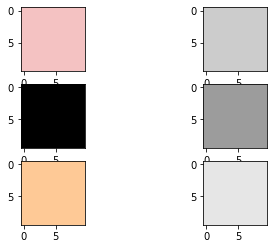

In [62]:
#Red
lo_red_square = np.full((10, 10, 3), low_red_hsv, dtype = np.uint8)/255.0
do_red_square = np.full((10, 10, 3), high_red_hsv, dtype = np.uint8)/255.0
#Blue
lo_blue_square = np.full((10, 10, 3), low_blue_hsv, dtype = np.uint8)/255.0
do_blue_square = np.full((10, 10, 3), high_blue_hsv, dtype = np.uint8)/255.0
#Yellow
lo_yellow_square = np.full((10, 10, 3), low_yellow_hsv, dtype = np.uint8)/255.0
do_yellow_square = np.full((10, 10, 3), high_yellow_hsv, dtype = np.uint8)/255.0

#Red
plt.subplot(3, 2, 1)
plt.imshow(hsv_to_rgb(lo_red_square))
plt.subplot(3, 2, 2)
plt.imshow(hsv_to_rgb(do_red_square))
plt.subplot(3, 2, 3)
#Blue
plt.imshow(hsv_to_rgb(lo_blue_square))
plt.subplot(3, 2, 4)
plt.imshow(hsv_to_rgb(do_blue_square))
plt.subplot(3, 2, 5)
#Yellow
plt.imshow(hsv_to_rgb(lo_yellow_square))
plt.subplot(3, 2, 6)
plt.imshow(hsv_to_rgb(do_yellow_square))
plt.show()

#All do_square are gray?
#Only lo_blue_square is black?

# Load the Image Sources

In [54]:
img = cv.imread('./TSRD/000_0002_j.png')
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

cv.imshow('IMG', img_hsv)
cv.waitKey(0)
cv.destroyAllWindows()

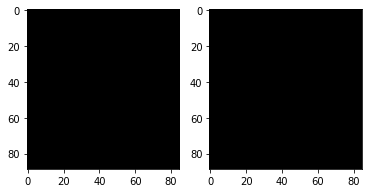

In [55]:
mask = cv.inRange(img_hsv, low_red_hsv, high_red_hsv)
res = cv.bitwise_and(img, img, mask = mask)

plt.subplot(1,2,1)
plt.imshow(mask, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(res)
plt.show()

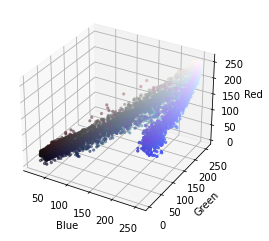

In [19]:
r, g, b = cv.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

pixel_colors = img.reshape((img.shape[0]*img.shape[1], 3))
norm = colors.Normalize(vmin = -1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(b.flatten(), g.flatten(), r.flatten(), facecolors = pixel_colors,
            marker = ".")
axis.set_xlabel('Blue')
axis.set_ylabel('Green')
axis.set_zlabel('Red')
plt.show()

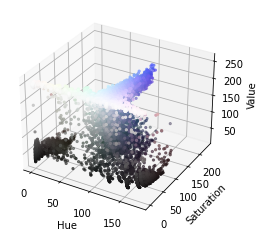

In [20]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors = pixel_colors,
            marker = ".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()